# Climate Change Belief Analysis 2021
#### By team ZM2

# Index

# Introduction

Climate change is one of the leading concerns for the modern generation. It impacts not only the day-to-day lives of individuals, but also dictates the policies of nearly every multi-national company in the world. Many countries around the world have put legislation in place that require companies doing business with them to comply with their climate change laws.

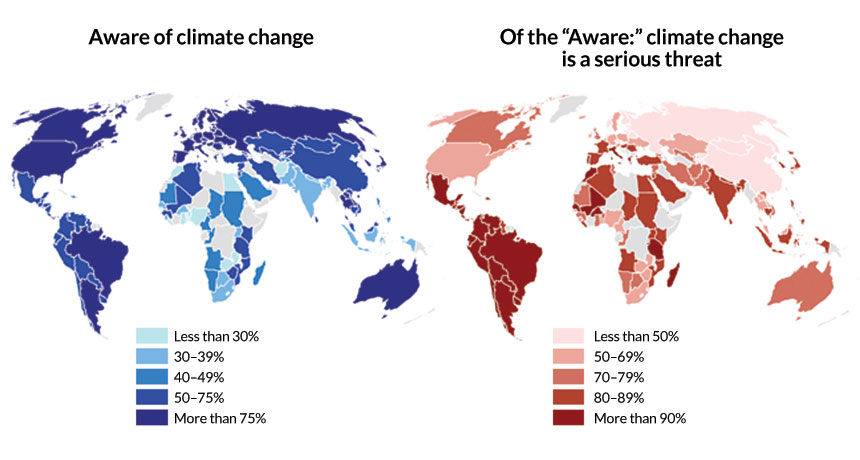

This has caused companies to be operate and build their businesses around their environmental impact. This is not only a legal requirement in many cases but also a form of marketing as ‘going green’(generating a low carbon footprint) is something many consumers/clients look for in businesses they wish to deal with. 
Businesses have made changes to operate at not only environmentally safe levels but also at sustainable ones too. As such, they would like to know how people perceive climate change and how much of a threat they think it is. This would contribute greatly to marketing research and allow for better insight into how their product or service would be perceived or how it could be potentially improved.

Due to these factors, we have created a machine learning classification model, that would be able to accurately classify if a person does, or does not believe in climate change. We will be using message data generated by Twitter users for this purpose. We will also be creating an accompanying application using Streamlit together with this model, to better represent our findings to environmentally conscious companies.
We will provide an accurate, efficient and easy to use solution to this challenge, which will also provide access to a vast number of diverse consumer sentiments. This will greatly enhance the level of insight a company will have when creating marketing strategies in the future.


<a id="data_size"></a>
# Data size and structure

The train dataset given consists of object and integer variables. The object variable (message column) requires cleaning and/or feature engineering to be usable. As for the integer variables, little to no cleaning needs to be done as there are little to no issues with them in this dataset. In total, there are 3 columns/variables. The first column/variable  will be used as our response variable (sentiment).

Below, is a display of the variables. All of them are discussed in more detail throughout this notebook

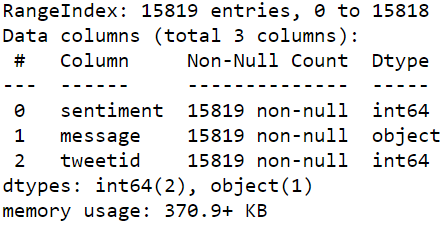

# Load Dependencies

Loading required python packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score


# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import GridSearchCV, cross_val_score

#metrics, procssing and model selection
from nltk import pos_tag
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
#Setting Plot figure size
sns.set(rc={'figure.figsize':(12.8,11.27)})

In [2]:
!pip install nlppreprocess

In [3]:
from nlppreprocess import NLP

# Data Collection

As kaggle already provided us with data in the form of csv files, all we have to do is load them into dataframes.

In [4]:
#loading csv's
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv('sample_submission.csv')

# Data Preprocessing

## Exploratory Data Analysis

In [5]:
# seeing the first 5 entires of the train dataset to see what the dataset looks like
train.head(5)

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [6]:
# Seing the shape of the train dataset
train.shape

(15819, 3)

In [7]:
# seeing the first 5 entires of the test dataset to see what the dataset looks like
test.head(5)

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

In [8]:
# Seing the shape of the test dataset
test.shape

(10546, 2)

In [9]:
# Information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
sentiment    15819 non-null int64
message      15819 non-null object
tweetid      15819 non-null int64
dtypes: int64(2), object(1)
memory usage: 370.8+ KB


In [10]:
# Seing the number of unqiue values in sentiment
train['sentiment'].unique()

array([ 1,  2,  0, -1])

We can see there are only 4 types of sentiments in this dataset, ranging from -1 to 2

In [11]:
# Seeing the distribution of sentiments 
train.describe()

sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000

## Missing Values

Kaggle tries to provide us with clean data but it's always a good idea to check for ourselves. We check for null and empty values.

In [12]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [13]:
i=0
for x in train.columns:
    if '' in sorted(train[x].unique()):
        i+=1
print('The data contains '+str(i)+' empty values over all columns')

The data contains 0 empty values over all columns


None of our columns contain any null or empty values.

In [14]:
# Checking for white space
print(len(train['message']))
print(sum(train['message'].apply(lambda x: x.isspace())))

15819
0


## Anaylising the sentiment

### Distribution values  of labels

In [15]:
# checking the distribution
train['sentiment'].value_counts()/train.shape[0]

 1    0.539225
 2    0.230103
 0    0.148745
-1    0.081927
Name: sentiment, dtype: float64

### Number of Unique values:

In [16]:
train['sentiment'].unique()
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

### Converting the Sentiment Labels from numbers to text

Changing the Sentiment numbers to legiable text for better transparancy on what they mean, so we can correlate and understand the data better

In [17]:
# Making a copy of the train data since we will be making changes to the dataset
train_df = train.copy()

In [18]:
train_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in train_df['sentiment']]

Now that sentiment has been labeled in a more readable way, we can take a closer look at it

### Number of Unique values:

In [19]:
# Checking the unique values and their counts
train['sentiment'].unique()
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [20]:
# checking the distribution
train['sentiment'].value_counts()/train.shape[0]

 1    0.539225
 2    0.230103
 0    0.148745
-1    0.081927
Name: sentiment, dtype: float64

Now we will graph the sentiments

Text(0.5, 1.0, 'Message count per sentiment')

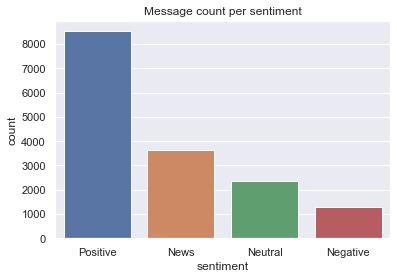

In [21]:
sns.countplot(x=train_df['sentiment'])
plt.title('Message count per sentiment')

Here we can see the number of positive sentiments are drasticly higher than any other sentiment and negative sentiments are the lowest. This could lead us to think that the majority of users of pro climate change and those against us are in the minority but lets take a look at the numerical distribution:

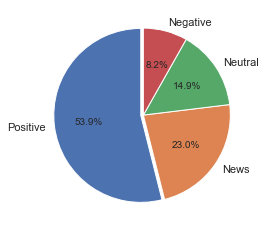

In [22]:
#numerical distribution
values = train_df['sentiment'].value_counts()/train_df.shape[0]
labels = (train_df['sentiment'].value_counts()/train_df.shape[0]).index
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.03, 0, 0., 0))
plt.show()

Analysing these two graphs reveals to us that there is an imbalance of classes within this dataset. This can cause an uneven/disproportionate view of each class. This could cause accuracy issues and increase risk of errors when deducing the data. We will need to further analyse the data to derive more insights.

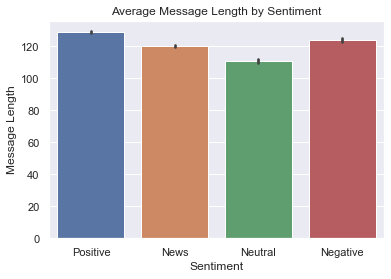

In [23]:
sns.barplot(x='sentiment', y=train_df['message'].apply(len) ,data = train_df)
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.title('Average Message Length by Sentiment')
plt.show()

Here we can see the average message length by sentiment. Those with positive sentiments have the most to say it would seem but the differences between message lengths is not substantial enough to draw any conclusions from.

### Counting user names that are repeated in tweets

Here we are looking for Twitter accounts/users that are commonly brought up in messages (also known as tagging or a tag) to better derive connotations between them and sentiments

In [24]:
# Getting users
train_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                     if '@' in line else np.nan for line in train_df.message]
# Getting hastags
train_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in train_df.message]
# Getting a count of users
counts = train_df[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)

In [25]:
# Seeing the 10 most populat users
counts.head(10)

users  message
3410            @StephenSchlegel      307
3270                 @SenSanders      243
6182            @realDonaldTrump      143
448               @BernieSanders      121
612                         @CNN      106
6622                    @thehill       89
2521  @NatGeoChannel@LeoDiCaprio       75
5952                    @nytimes       68
3296             @SethMacFarlane       68
6785             @washingtonpost       56

We will now look at the top 10 users tagged by sentiment

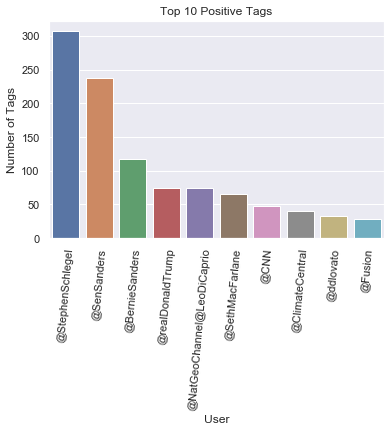

In [26]:
# Top 10 positive tags
sns.countplot(x="users", data=train_df[train_df['sentiment'] == 'Positive'],
              order=train_df[train_df['sentiment'] == 'Positive'].users.value_counts().iloc[:10].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 10 Positive Tags')
plt.xticks(rotation=85)
plt.show()

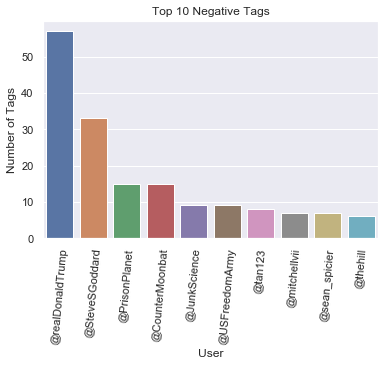

In [27]:
# Top 10 negative tags
sns.countplot(x="users", data=train_df[train_df['sentiment'] == 'Negative'],
              order=train_df[train_df['sentiment'] == 'Negative'].users.value_counts().iloc[:10].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 10 Negative Tags')
plt.xticks(rotation=85)
plt.show()

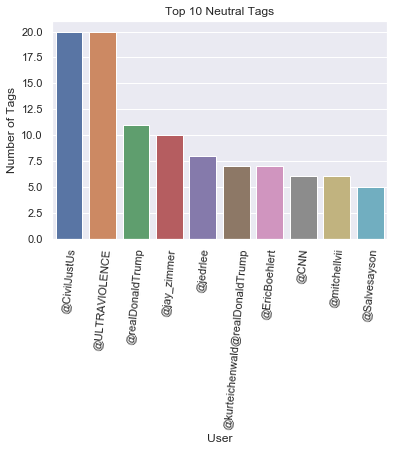

In [28]:
# Top 10 neutral tags
sns.countplot(x="users", data=train_df[train_df['sentiment'] == 'Neutral'],
              order=train_df[train_df['sentiment'] == 'Neutral'].users.value_counts().iloc[:10].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 10 Neutral Tags')
plt.xticks(rotation=85)
plt.show()

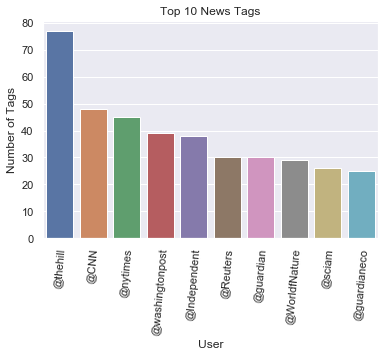

In [29]:
# Top 10 news tags
sns.countplot(x="users", data=train_df[train_df['sentiment'] == 'News'],
              order=train_df[train_df['sentiment'] == 'News'].users.value_counts().iloc[:10].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 10 News Tags')
plt.xticks(rotation=85)
plt.show()

From this we can derive some associations between twitter users and certain sentiments. We can see some predicted patterns such as Donald Trump being substantially tagged with regards to negative climate change sentiments, which is to be expected regarding his stance on it being largely negative. Popular news channels have their tags most commonly used for news sentiments. @SenSanders is the account of Bernie Sanders who is pro climate change so it makes sense he was tagged most for positive sentiments. Neutral tags don’t have any major names behind them but two users are definitely associated with neutral tags. 

### Testing data clarity by generating a Word Cloud

We will now create a word cloud to see what kind of words are being associated with messages

In [30]:
text = " ".join(tweet for tweet in train_df.message)
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 1973801 words in the combination of all tweets.


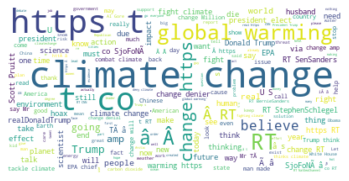

In [31]:
# Creating the wordcloud 
wordcloud = WordCloud(background_color="white").generate(text)

# Displaying the wordcloud:
# using matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see by this word cloud that there are a lot of unnecessary words/characters/symbols being used in messages, which don't allow us to accurately read the data, so before we start creating word clouds for each sentiment, we need to clean the twitter messages first, so we only have words that we can draw correlations and understandings from

# Data Cleaning

As we observed from trying to create a word cloud from the message data, we need to clean the message data first so it can be usable. Cleaning involves finding corrupt, incorrect or unnecessary data form the dataset and either removing it or replacing it with usable data. This will improve the usability and integrity of the data, allowing for more accurate predictions and understandings to take place. We will apply various techniques to achieve this such as using stemmer and lemmatisation as well as  changing the messages into a more readable manner by using the nlp tool.

In [32]:
# Testing the PorterStemmer 
stemmer = PorterStemmer()
print("The stemmed form of typing is: {}".format(stemmer.stem("typing")))
print("The stemmed form of types is: {}".format(stemmer.stem("types")))
print("The stemmed form of type is: {}".format(stemmer.stem("type")))

The stemmed form of typing is: type
The stemmed form of types is: type
The stemmed form of type is: type


In [33]:
# Testing Lemmatization
lemm = WordNetLemmatizer()
print("In  case of Lemmatization, typing is: {}".format(lemm.lemmatize("typing")))
print("In  case of Lemmatization, types is: {}".format(lemm.lemmatize("types")))
print("In  case of Lemmatization, type is: {}".format(lemm.lemmatize("type")))

In  case of Lemmatization, typing is: typing
In  case of Lemmatization, types is: type
In  case of Lemmatization, type is: type


In [34]:
def data_clean(line):
    #Removes urls, RT and white spaces
    line = re.sub(r'^RT ','', re.sub(r'https://t.co/\w+', '', line).strip()) 

    emojis = re.compile("["
                           u"\U0001F600-\U0001F64F"  # removes emojis,
                           u"\U0001F300-\U0001F5FF"  # removes pictures and symbols
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    line = emojis.sub(r'', line)

    
    # Removes puctuation
    punctuation = re.compile("[.;:!\'’‘“”?,\"()\[\]]")
    tweet = punctuation.sub("", line.lower()) 

    # Removes stopwords
    nlp_for_stopwords = NLP(replace_words=True, remove_stopwords=True, 
                            remove_numbers=True, remove_punctuations=False) 
    tweet = nlp_for_stopwords.process(tweet) # This will remove stops words that are not necessary. 

    # tokenisation
    # We used the split method instead of the word_tokenise library because our tweet is already clean at this point
    # and the twitter data is not complicated
    tweet = tweet.split() 

    # POS 
    # Part of Speech tagging is essential to ensure Lemmatization perfoms well.
    pos = pos_tag(tweet)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tweet = ' '.join([lemmatizer.lemmatize(word, po[0].lower()) 
                      if (po[0].lower() in ['n', 'r', 'v', 'a'] and word[0] != '@') else word for word, po in pos])

    return tweet

This will significantly improve the usability of tweet messages, however we also want to tokenize the tweet data into a list for model training purposes too, so we will create another function

In [35]:
def data_tokenizer(df):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    Tokenized_Doc=[]
    print("Preprocessing data.........\n")
    for data in df['message']:
        review = re.sub('[^a-zA-Z]', ' ', data)
        url = re.compile(r'https?://\S+|www\.\S+')
        review = url.sub(r'',review)
        html=re.compile(r'<.*?>')
        review = html.sub(r'',review)
        emojis = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        review = emojis.sub(r'',review)
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(review)
        gen_tweets = [lemm.lemmatize(token) for token in tokens if not token in stop_words]
        cleaned =' '.join(gen_tweets)
        Tokenized_Doc.append(gen_tweets)
        df['msg_tokens'] = pd.Series(Tokenized_Doc)
    return df

In [36]:
# testing the data_clean function
tweet = train.iloc[2,1]
test_tweet = data_clean(tweet)
print('BEFORE')
print(tweet)
print('AFTER')
print(test_tweet)

BEFORE
RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
AFTER
@rawstory researcher say we three year act climate change before its too late …


In [37]:
msg_clean = train['message'].apply(data_clean)

In [38]:
msg_clean.head(10)

0    polyscimajor epa chief not think carbon dioxid...
1    its not like we lack evidence anthropogenic gl...
2    @rawstory researcher say we three year act cli...
3    #todayinmaker# wire pivotal year in war climat...
4    @soynoviodetodas its and racist sexist climate...
5    worth read whether you not believe in climate ...
6    @thenation mike penny not believe in global wa...
7    @makeandmendlife six big thing we can today fi...
8    @aceofspadeshq my yo nephew inconsolable want ...
9    @paigetweedy no offense… but like… how you jus...
Name: message, dtype: object

In [39]:
train_df['clean_tweets'] = msg_clean

In [40]:
cleaned_text = " ".join(tweet for tweet in msg_clean)

Now that our data has been cleaned, we can make word clouds again without the unnecessary characters/symbols/words/etc...

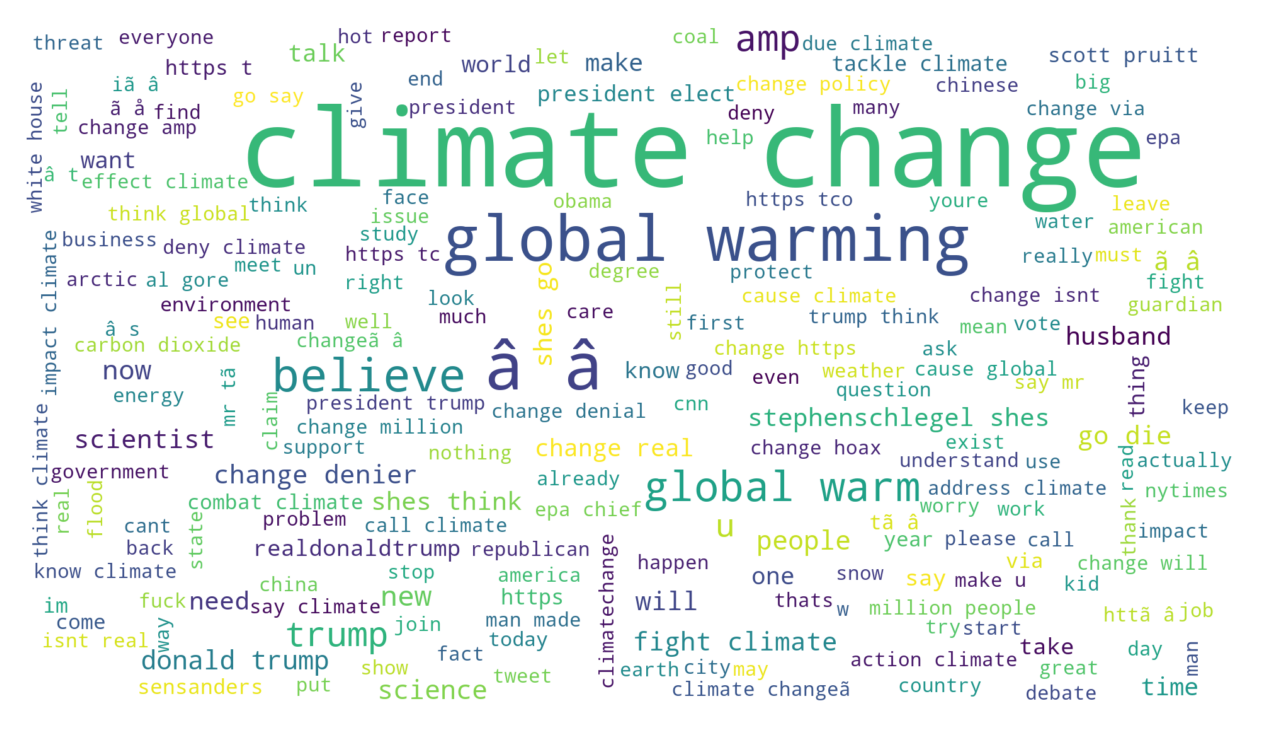

In [41]:
# Generating the word cloud image from all the messages
wordcloud = WordCloud(background_color="white",
                      width = 1920, height = 1080).generate(cleaned_text)

# Displaying the word cloud image:
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see a substantial improvement in data clarity. Most of the useless characters/text have been removed so better correlations and predictions can be made. We can also see that the central topic of climate change/global warming are popular topics, as are words associated with Ameria's former controversial president.

Now we will make word clouds for each sentiment


## Wordclouds by Sentiment

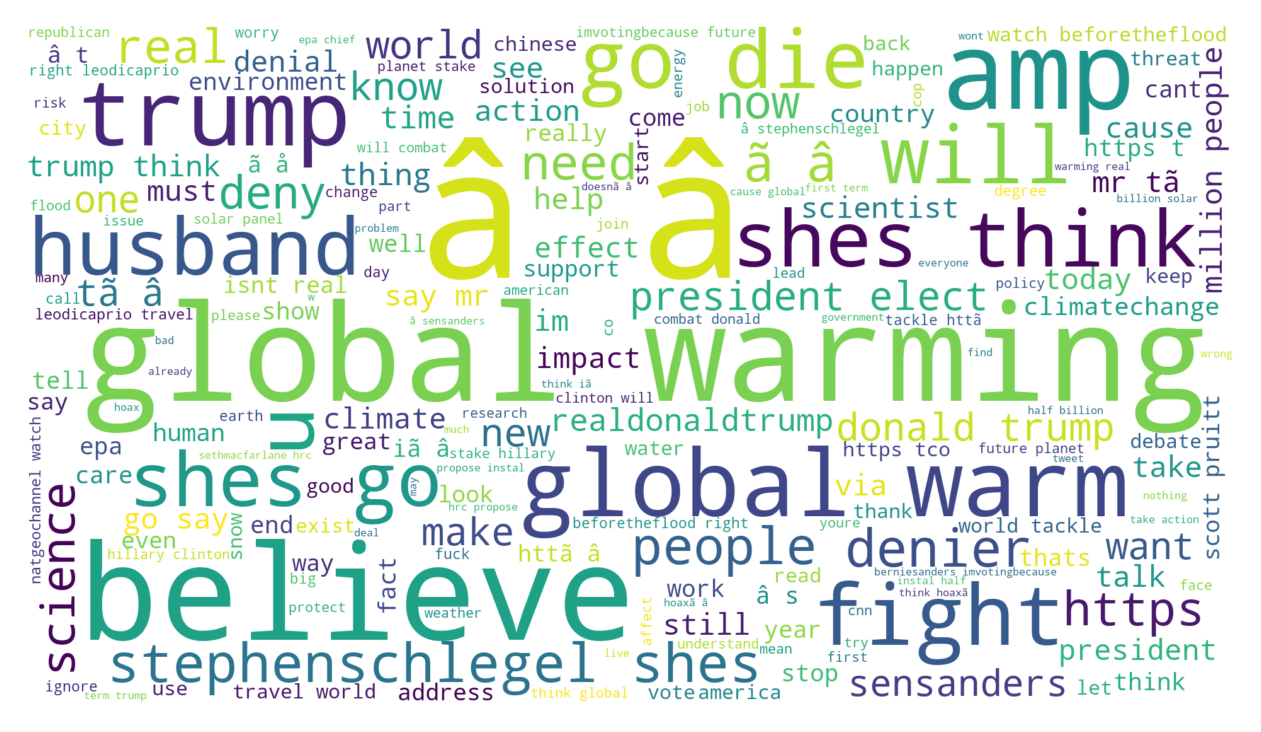

In [42]:
# Positive sentiment
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train_df['clean_tweets'][train_df['sentiment'] == 'Positive']))
wordcloud = WordCloud(background_color="white",
                      width = 1920, height = 1080).generate(corpus)

# Displaying the word cloud using matplotlib:
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As seen in prior graphs, Trump is a popular tag in seemingly every sentiment. "believe" is popular tag for positive sentiment which makes sense, so is "fight" and "die", likely due to arguments between users who are pro and against climate change, so such words are expected.

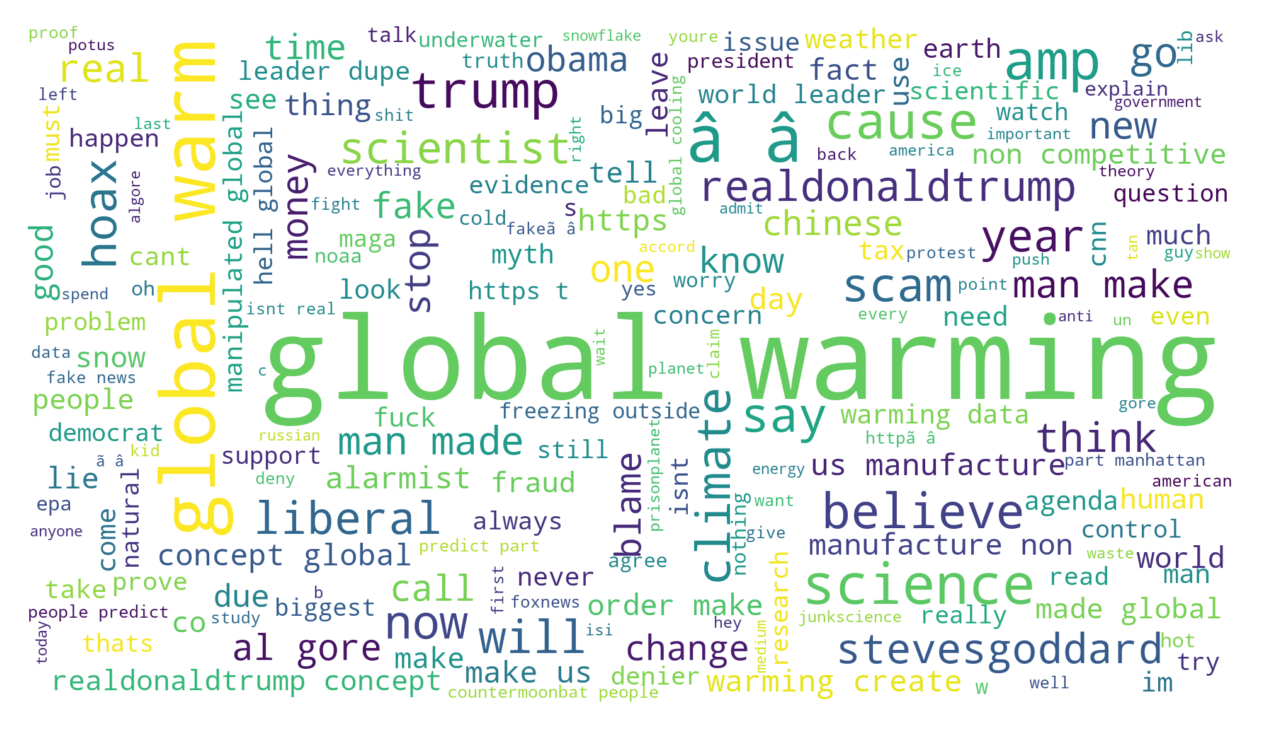

In [43]:
# Negative sentiment
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train_df['clean_tweets'][train_df['sentiment'] == 'Negative']))
wordcloud = WordCloud(background_color="white",
                      width = 1920, height = 1080).generate(corpus)

# Displaying the word cloud using matplotlib:
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Here we see donald trumps user tag is most commonly used with negative sentiment, which was expected given his stance on climate change. There are a lot more aggressive words used here, like "fake", "scam", "snowflake" and even a swear word. This too was expected given negative sentiments tend me more aggressively defended and often take on the roll of an 'attack'. Lots of words associated with climate deniers are observed too like the famous tag line "fake news" but there is also a fair amount of cross content with the positive sentiment.

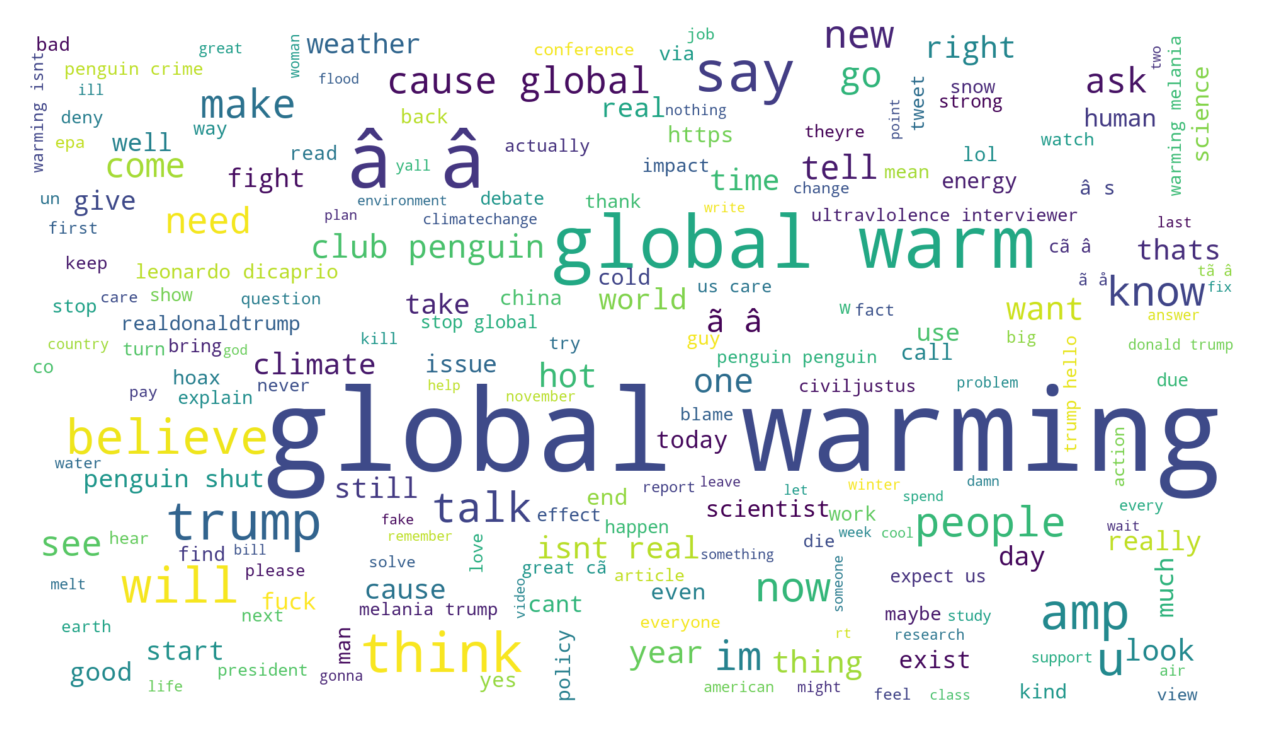

In [44]:
# Neutral sentiment
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train_df['clean_tweets'][train_df['sentiment'] == 'Neutral']))
wordcloud = WordCloud(background_color="white",
                      width = 1920, height = 1080).generate(corpus)

# Displaying the word cloud using matplotlib:
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The main talk topics are popularised in the neutral sentiment with less obvious bias being represented with regards to people’s opinions, which again is to be expected from a neutral sentiment

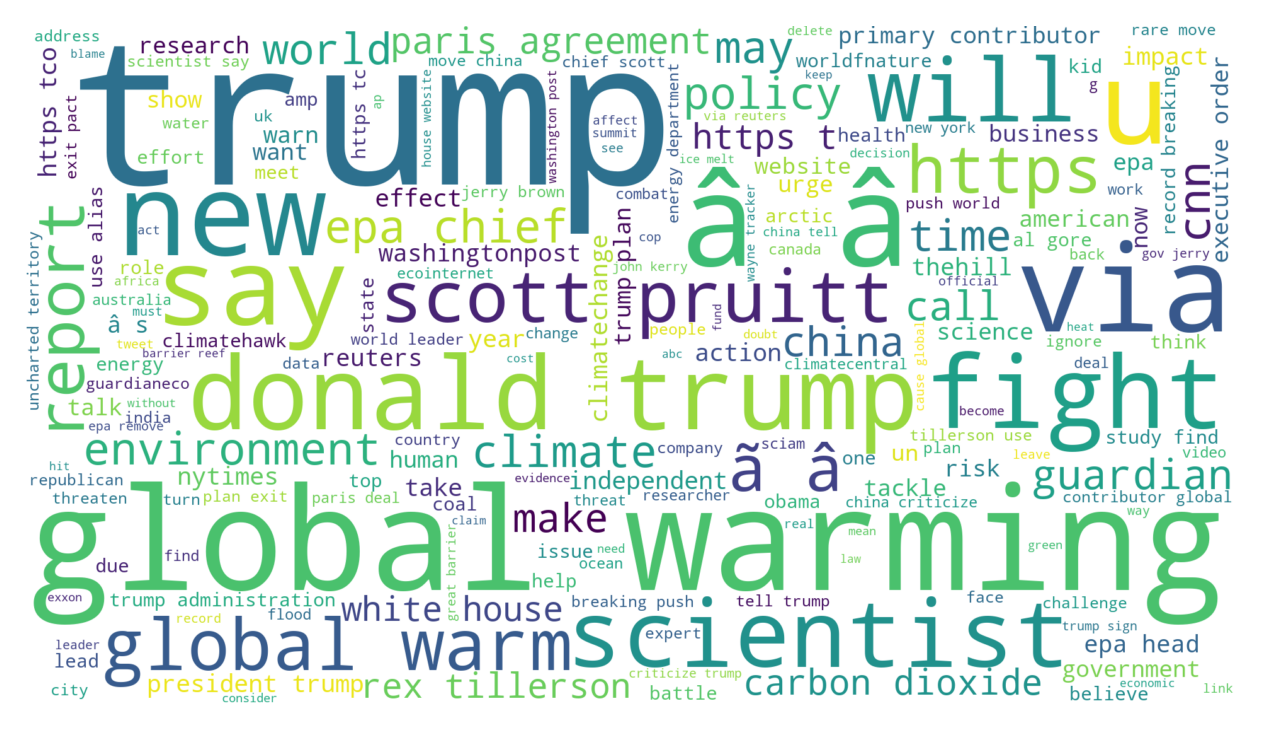

In [45]:
# News sentiment
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in train_df['clean_tweets'][train_df['sentiment'] == 'News']))
wordcloud = WordCloud(background_color="white",
                      width = 1920, height = 1080).generate(corpus)

# Displaying the word cloud using matplotlib:
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

All the major talk topics are represented in the news sentiment. The Trump once again is a feature highlight. The names of news outlets are common here and words such as "plan" and "policy", "effect" are too which is vindicative of news topics

# Feature Engineering

In [46]:
# Converting the collection of clean messages to a matrix of token counts
corpus = train_df['clean_tweets']

vectorizer = CountVectorizer()
count_vectorized = vectorizer.fit_transform(corpus)

In [47]:
# Converting the collection of clean messages to a matrix of TF-IDF features
data = train_df['clean_tweets']

vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
vectorized = vectorizer.fit_transform(data)

In [48]:
# Using sparse to train the model using both representations.
import scipy.sparse

# Defining the features
X = scipy.sparse.hstack([vectorized, count_vectorized])
y = train_df['sentiment']

# Model Selection

We will be working to balance the data as in individual notebooks it was discovered that the accuracy is much greater when the data is balanced as opposed to using imbalanced data

In [49]:
# Splitting features and label for the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
data = train.copy()

In [51]:
# importing the module and creating a resampling variable
from sklearn.utils import resample
class_size = int(len(data[data['sentiment']==1])/2)

In [52]:
# seperating the 4 classes
class_1 = data[data['sentiment']==-1]
class_2 = data[data['sentiment']==0]
class_3 = data[data['sentiment']==1]
class_4 = data[data['sentiment']==2]

In [53]:
# upsampling classes 1, 2, and 4 & downsampling class 3
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)

In [54]:
# New Dataframe
balance_train_df = pd.concat([class_1_up, class_2_up, class_4_up,class_3_down])

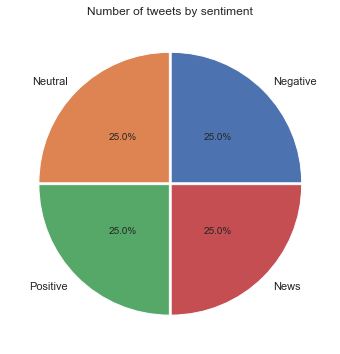

In [55]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x = balance_train_df['sentiment'].value_counts(), autopct="%.1f%%", explode = [0.01] * 4,
        labels = ['Negative', 'Neutral', 'Positive', 'News'], pctdistance = 0.5)
plt.title("Number of tweets by sentiment");
plt.show()

We can see the balance of sentiments has been achieved

# Training and Evaluation

In [56]:
# Defining the features as well as the label
X1 = balance_train_df['message']
X_balance = X1.apply(data_clean)
y_balance = balance_train_df['sentiment']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_balance, y_balance, test_size=0.01, random_state=42)

### Logistic Regression

Logistic regression is a widely used machine learning model.Logistic regression does not directly model the response (in our case, a tweet message), but rather models the probability that this response belongs to a specific sentiment. Logistic regression uses the sigmoid curve, which imposes a value between 0 and 1 to help classify these observations.

In [57]:
# Create a pipeline for Linear Regression
lr_clf = Pipeline([('count_vec', CountVectorizer(lowercase = True, ngram_range=(1, 2), analyzer='word')),
                         ('clf', LogisticRegression(solver='liblinear', 
                                                    penalty='l2',
                                                    max_iter=1000)),])

#Fitting the Logistic Regression
lr_clf.fit(X_train, y_train)  
lr_predictions = lr_clf.predict(X_test)
    
    
# Classification report
print(classification_report(y_test, lr_predictions))
lr_clf_metrics = classification_report(y_test, lr_predictions)

# Use accuracy_score function to get the accuracy
lr_clf_Accuracy = round(accuracy_score(lr_predictions, y_test)*100, 2)
print("Linear Regression Accuracy Score: ",lr_clf_Accuracy)
lr_clf_F1 = round(f1_score(lr_predictions, y_test, average="macro")*100, 2)
print("F1 Score: ", lr_clf_F1)

/Users/keletso/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

          -1       0.95      0.97      0.96        39
           0       0.96      0.98      0.97        45
           1       0.94      0.73      0.82        44
           2       0.80      0.95      0.87        43

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.90       171

Linear Regression Accuracy Score:  90.64
F1 Score:  90.55


Here, we can see the effectiveness of using balanced data and using linear regression for training, it gave us an F1 score of 90.55

## Linear Support Vector 

![svmplot.png](attachment:svmplot.png)

The support vector machine will find the largest edge hyperplane for classification. This means that it tries to find a hyperplane that maximizes the margin between the hyperplane and the observation, that is, it finds a plane as far away from the observation as possible (this is indicated by the graph on the right). The maximum distance from the observation is considered the best possible decision limit. Observations at the boundary are called support vectors, which can help the model find the best hyperplane.

In [58]:
# Create pipeline for Linear SVC:
SVM = Pipeline([('count_vec', CountVectorizer(lowercase = True, ngram_range=(1, 2), analyzer='word')),
                         ('clf', SVC(C= 50, gamma = 'scale', kernel= 'rbf')),])

# Fitting the model using Linear SVC
SVM.fit(X_train, y_train)
pred_SVM = SVM.predict(X_test)

# Classification report
print(classification_report(y_test, pred_SVM))
SVM_metrics = classification_report(y_test, pred_SVM)

# Use accuracy_score function to get the accuracy
SVM_Accuracy = round(accuracy_score(pred_SVM, y_test)*100, 2)
print("Linear SVC Accuracy Score: ",SVM_Accuracy)
SVM_F1 = round(f1_score(pred_SVM, y_test, average="macro")*100, 2)
print("F1 Score: ", SVM_F1)

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94        39
           0       0.94      0.98      0.96        45
           1       0.93      0.64      0.76        44
           2       0.76      0.95      0.85        43

    accuracy                           0.88       171
   macro avg       0.89      0.88      0.87       171
weighted avg       0.89      0.88      0.87       171

Linear SVC Accuracy Score:  87.72
F1 Score:  87.38


### Naive Bayes Multinomial

The Naive Bayes classifier assumes that the existence of a particular feature in a class is independent of the existence of any other features. Use the prior probability and the probability that the observation belongs to a certain class to calculate the posterior probability that the observation belongs to each class. Finally, the class with the highest posterior probability is the class to which the observation is classified to.

In [59]:
# Create pipeline for Naive Bayes Multinomial
NBM = Pipeline([('count_vec', CountVectorizer(lowercase = True, ngram_range=(1, 2), analyzer='word')),
                ('NBM_CLF', MultinomialNB(alpha = 0.1)),])

# Model Generation Using Naive Bayes Multinomial
NBM.fit(X_train, y_train)
pred_NBM = NBM.predict(X_test)

# Classification report
print(classification_report(y_test, pred_NBM))
NBM_metrics = classification_report(y_test, pred_NBM)

# Use accuracy_score function to get the accuracy
NBM_Accuracy = round(accuracy_score(pred_NBM, y_test)*100, 2)
print("Naive Bayes Accuracy Score: ",NBM_Accuracy)
NBM_F1 = round(f1_score(pred_NBM, y_test, average="macro")*100, 2)
print("F1 Score: ",NBM_F1 )

              precision    recall  f1-score   support

          -1       0.95      0.97      0.96        39
           0       0.96      0.96      0.96        45
           1       0.92      0.75      0.83        44
           2       0.82      0.95      0.88        43

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.90       171

Naive Bayes Accuracy Score:  90.64
F1 Score:  90.61


## Model Comparison

In [60]:
# Creating a dataframe with our models and their performances metrics
classifier_scores = {'Classifiers':['Logistic Regression','Support Vector Classifier','Naive Bayes Multinomial Model'],
                    
                    'Accuracy Score':[lr_clf_Accuracy, SVM_Accuracy, NBM_Accuracy],
                     
                     'F1-Score': [lr_clf_F1, SVM_F1, NBM_F1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['F1-Score'],ascending=False, inplace = True)
df


Classifiers  Accuracy Score  F1-Score
2  Naive Bayes Multinomial Model           90.64     90.61
0            Logistic Regression           90.64     90.55
1      Support Vector Classifier           87.72     87.38

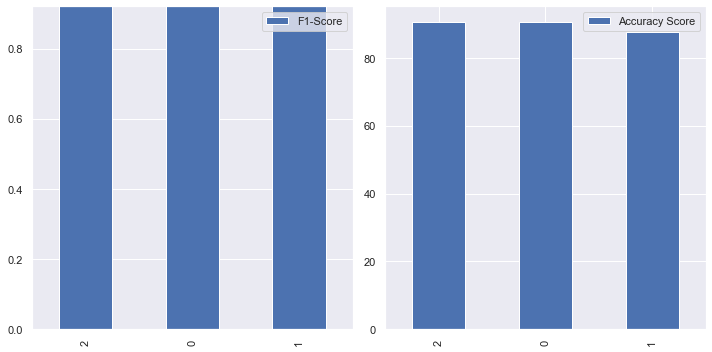

In [61]:
plot13, ax = plt.subplots(1, 2, figsize=(10, 5))
df.plot(y=['F1-Score'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.0,0.92])
df.plot(y='Accuracy Score', kind='bar', ax=ax[1])

plt.tight_layout()
plt.show()

In [62]:
###Linear Graph

# Training the model with Tokenized tweets

Now we will use our data_tokenizer function and apply a different method of model training since we'll be using a list of data

In [63]:
train_df = data_tokenizer(train)
train_df['msg_tokens'].head(10)

Preprocessing data.........



0    [PolySciMajor, EPA, chief, think, carbon, diox...
1    [It, like, lack, evidence, anthropogenic, glob...
2    [RT, RawStory, Researchers, say, three, year, ...
3    [TodayinMaker, WIRED, pivotal, year, war, clim...
4    [RT, SoyNovioDeTodas, It, racist, sexist, clim...
5    [Worth, read, whether, believe, climate, chang...
6    [RT, thenation, Mike, Pence, believe, global, ...
7    [RT, makeandmendlife, Six, big, thing, ALL, to...
8    [AceofSpadesHQ, My, yo, nephew, inconsolable, ...
9    [RT, paigetweedy, offense, like, believe, glob...
Name: msg_tokens, dtype: object

### Normalizing the data

In [64]:
X = train_df['msg_tokens']
y = train_df['sentiment']

In [68]:
data = train_df['msg_tokens']
corpus = [' '.join(i) for i in data] #create your corpus here

vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['aa', 'aaa', 'aaaaaaaaaaa', 'aaaaaand', 'aaaaand', 'aaaand', 'aaacg', 'aaaehcr', 'aaas', 'aafv', 'aag', 'aagdvfplit', 'aai', 'aaihr', 'aaissfab', 'aaj', 'aaklx', 'aalicesayss', 'aamrry', 'aan', 'aapgujarat', 'aapinnews', 'aapnews', 'aapsyc', 'aar', 'aarne', 'aaronbastani', 'aaronwherry', 'aasfs', 'aashi', 'aasuekmzes', 'aatechnology', 'aau', 'aaxl', 'aazlf', 'aazthu', 'ab', 'abafak', 'abaixo', 'abandon', 'abandoned', 'abandoning', 'abbot', 'abbott', 'abbyhoward', 'abbymartin', 'abc', 'abcdesposito', 'abchx', 'abcnews', 'abcnewsmelb', 'abcpolitics', 'abcthedrum', 'abcworldnews', 'abda', 'abdah', 'abdulszn', 'abdwj', 'aberdeenshire', 'aberration', 'aberuni', 'aberuninews', 'abfalecbaldwin', 'abfd', 'abfeotjctm', 'abfortisetliber', 'abgirnoqgh', 'abgp', 'abh', 'abi', 'abide', 'abigail', 'ability', 'abiwilks', 'abjmw', 'abjpu', 'abkpmovfo', 'able', 'ableg', 'abndp', 'abnhwcefl', 'abninfvet', 'abnormal', 'abnormally', 'abo', 'abolish', 'abolishes', 'abolishing', 'aboriginal', 'abortion', '

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
corpus

['PolySciMajor EPA chief think carbon dioxide main cause global warming wait http co yeLvcEFXkC via mashable',
 'It like lack evidence anthropogenic global warming',
 'RT RawStory Researchers say three year act climate change late http co WdT KdUr f http co Z ANPT',
 'TodayinMaker WIRED pivotal year war climate change http co wOTxTLcD',
 'RT SoyNovioDeTodas It racist sexist climate change denying bigot leading poll ElectionNight',
 'Worth read whether believe climate change http co ggLZVNYjun http co AFE mAH j',
 'RT thenation Mike Pence believe global warming smoking cause lung cancer http co gvWYaauU R',
 'RT makeandmendlife Six big thing ALL today fight climate change climate activist http co TYMLu DbNM h',
 'AceofSpadesHQ My yo nephew inconsolable He want die old age like perish fiery hellscape climate change',
 'RT paigetweedy offense like believe global warming',
 'RT StephenSchlegel thinking going die husband believe climate change http co SjoFoN',
 'I hope people vocal climate 

### Training and Evaluation of the model with tokenized data

In [70]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [71]:
# Model generation using LOGISTIC REGRESSION CLASSIFIER
scikit_log_reg = LogisticRegression(solver='liblinear', C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(X_train, y_train)

# MODEL PREDICTIONS
y_pred = model.predict(X_test)

# Classification report
print(metrics.classification_report(y_test, y_pred))

# Use accuracy_score function to get the accuracy
scikit_log_reg_Accuracy = round(accuracy_score(y_pred , y_test)*100, 2)
print("Linear SVC Accuracy Score: ",scikit_log_reg_Accuracy)
scikit_log_reg_F1 = round(f1_score(y_pred , y_test, average="macro")*100, 2)
print("F1 Score: ", scikit_log_reg_F1)

/Users/keletso/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

          -1       0.81      0.41      0.54       278
           0       0.63      0.41      0.50       425
           1       0.77      0.88      0.82      1755
           2       0.77      0.80      0.78       706

    accuracy                           0.76      3164
   macro avg       0.74      0.63      0.66      3164
weighted avg       0.75      0.76      0.75      3164

Linear SVC Accuracy Score:  75.85
F1 Score:  66.19


#### SUPPORT VECTOR CLASSIFIER

In [72]:
# Model generation using SUPPORT VECTOR CLASSIFIER
svm = SVC(C= 50, gamma = 'scale', kernel= 'rbf')
svm.fit(X_train,y_train)
# MODEL PREDICTIONS
svm_pred = svm.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, svm_pred))

# Use accuracy_score function to get the accuracy
svm_Accuracy = round(accuracy_score(svm_pred , y_test)*100, 2)
print("Linear SVC Accuracy Score: ",svm_Accuracy)
svm_F1 = round(f1_score(svm_pred , y_test, average="macro")*100, 2)
print("F1 Score: ", svm_F1)

              precision    recall  f1-score   support

          -1       0.88      0.35      0.50       278
           0       0.67      0.36      0.47       425
           1       0.75      0.91      0.82      1755
           2       0.80      0.78      0.79       706

    accuracy                           0.76      3164
   macro avg       0.77      0.60      0.64      3164
weighted avg       0.76      0.76      0.74      3164

Linear SVC Accuracy Score:  75.63
F1 Score:  64.43


#### Naive Bayes Multinomial

In [73]:
# Model generation using Naive Bayes Multinomial
nbm = MultinomialNB(alpha = 0.1)
nbm.fit(X_train,y_train)
# MODEL PREDICTIONS
nbm_pred = nbm.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, nbm_pred))

# Use accuracy_score function to get the accuracy
nbm_Accuracy = round(accuracy_score(nbm_pred , y_test)*100, 2)
print("Linear SVC Accuracy Score: ",nbm_Accuracy)
nbm_F1 = round(f1_score(nbm_pred , y_test, average="macro")*100, 2)
print("F1 Score: ", nbm_F1)

              precision    recall  f1-score   support

          -1       0.74      0.37      0.50       278
           0       0.57      0.36      0.44       425
           1       0.75      0.87      0.80      1755
           2       0.74      0.75      0.75       706

    accuracy                           0.73      3164
   macro avg       0.70      0.59      0.62      3164
weighted avg       0.72      0.73      0.72      3164

Linear SVC Accuracy Score:  73.14
F1 Score:  62.25


In [74]:
# MODEL PREDICTIONS: PROBABILITIES
probs = model.predict_proba(X_test)
probs

array([[5.89037427e-02, 4.71152094e-02, 8.55149615e-01, 3.88314329e-02],
       [2.29826533e-02, 5.13583536e-02, 1.80960121e-01, 7.44698872e-01],
       [3.46141081e-02, 3.32030926e-01, 6.32558449e-01, 7.96516589e-04],
       ...,
       [6.00389265e-02, 2.28345544e-01, 6.42372249e-01, 6.92432803e-02],
       [8.64476842e-03, 1.52112824e-01, 8.24562587e-01, 1.46798204e-02],
       [5.48820245e-02, 1.31007539e-01, 6.96549800e-01, 1.17560636e-01]])

In [75]:
# GET TOP K PREDICTIONS BY PROB - note these are just index
best_n = np.argsort(probs, axis=1)[:,-5:]
best_n

array([[3, 1, 0, 2],
       [0, 1, 2, 3],
       [3, 0, 1, 2],
       ...,
       [0, 3, 1, 2],
       [0, 3, 1, 2],
       [0, 3, 1, 2]])

In [76]:
# GET CATEGORY OF PREDICTIONS
preds_prob=[[model.classes_[predicted_cat] for predicted_cat in prediction] for prediction in best_n]
preds_prob

[[2, 0, -1, 1],
 [-1, 0, 1, 2],
 [2, -1, 0, 1],
 [2, 1, 0, -1],
 [2, -1, 0, 1],
 [2, -1, 0, 1],
 [-1, 0, 2, 1],
 [-1, 0, 2, 1],
 [-1, 0, 2, 1],
 [-1, 2, 0, 1],
 [0, 1, -1, 2],
 [-1, 2, 0, 1],
 [0, -1, 1, 2],
 [-1, 2, 0, 1],
 [-1, 0, 1, 2],
 [0, -1, 2, 1],
 [-1, 0, 1, 2],
 [2, -1, 0, 1],
 [2, 0, -1, 1],
 [-1, 0, 2, 1],
 [-1, 0, 2, 1],
 [-1, 2, 0, 1],
 [2, -1, 0, 1],
 [-1, 0, 2, 1],
 [-1, 0, 2, 1],
 [-1, 0, 1, 2],
 [-1, 0, 2, 1],
 [-1, 0, 2, 1],
 [2, -1, 1, 0],
 [2, 0, -1, 1],
 [-1, 0, 2, 1],
 [-1, 2, 0, 1],
 [-1, 2, 0, 1],
 [-1, 0, 2, 1],
 [-1, 2, 0, 1],
 [0, 2, -1, 1],
 [-1, 0, 2, 1],
 [2, 0, -1, 1],
 [0, 2, -1, 1],
 [-1, 0, 2, 1],
 [-1, 0, 2, 1],
 [2, -1, 0, 1],
 [-1, 0, 2, 1],
 [1, -1, 0, 2],
 [1, 0, 2, -1],
 [2, -1, 0, 1],
 [-1, 0, 2, 1],
 [2, -1, 0, 1],
 [-1, 2, 0, 1],
 [0, 1, -1, 2],
 [-1, 0, 2, 1],
 [2, -1, 0, 1],
 [2, -1, 0, 1],
 [-1, 0, 2, 1],
 [2, -1, 0, 1],
 [2, 0, -1, 1],
 [2, 0, -1, 1],
 [-1, 2, 0, 1],
 [1, 2, -1, 0],
 [-1, 0, 1, 2],
 [-1, 2, 0, 1],
 [2, -1, 0, 1],
 [-1, 0,

## Model Comparison

In [77]:
# Creating a dataframe with our models and their performances metrics
model_scores = {'Classifiers':['Logistic Regression','Support Vector Classifier','Naive Bayes Multinomial Model'],
                    
                    'Accuracy_Score':[scikit_log_reg_Accuracy, svm_Accuracy, nbm_Accuracy],
                     
                     'F1_Score': [scikit_log_reg_F1, nbm_F1, nbm_F1]}
df2= pd.DataFrame(model_scores)
df2.sort_values(by=['F1_Score'],ascending=False, inplace = True)
df2


Classifiers  Accuracy_Score  F1_Score
0            Logistic Regression           75.85     66.19
1      Support Vector Classifier           75.63     62.25
2  Naive Bayes Multinomial Model           73.14     62.25

 It is obvious that the Logistic Regression model is the best model for our classification problem

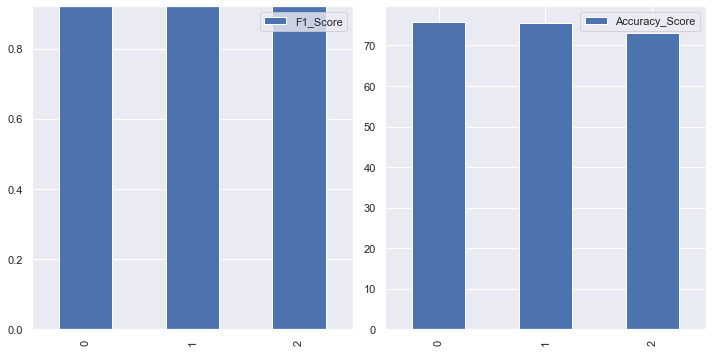

In [78]:
plot13, ax = plt.subplots(1, 2, figsize=(10, 5))
df2.plot(y=['F1_Score'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.0,0.92])
df2.plot(y='Accuracy_Score', kind='bar', ax=ax[1])

plt.tight_layout()
plt.show()

In [79]:
# Linear graph

### Using the test dataset to predict the data

In [82]:
# Data cleaning
test_df = data_tokenizer(test)

Preprocessing data.........



In [83]:
# Normalizing data
data2 = test_df['msg_tokens']
corpus = [' '.join(i) for i in data2] 
tests = vectorizer.transform(corpus)

In [84]:
# Using the same model to do the predictions
pred = svm.predict(tests)
predictions = pred[:]
predictions

array([1, 1, 1, ..., 1, 0, 1])

# Conclusion

# Making a submission

In [86]:
tweet_id = test['tweetid']

In [87]:
# create submission dataframe
submission = pd.DataFrame(
    {'tweetid': tweet_id,
     'sentiment': predictions
    })

In [88]:
submission.to_csv("ZM2_Classification_Predict_SVM.csv", index=False)

/Users/keletso/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


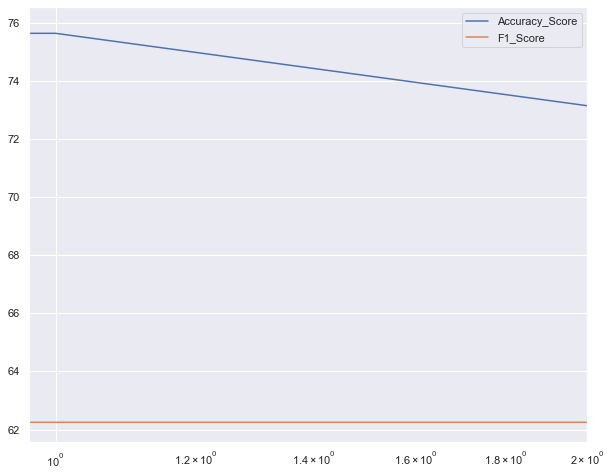

In [99]:
df2[['Accuracy_Score', 'F1_Score']].plot(kind = 'line', figsize=(10, 8), logx=True)

# Pickling the model

In [ ]:
import pickle
model_save_path = "lr_clf.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lr_clf, file)